<a href="https://colab.research.google.com/github/asyaf/public_speaking/blob/main/Data_exploration_lecture_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration example

## Install packages

In [24]:
!pip install -UIv pandas-profiling==3.4.0

Streaming output truncated to the last 5000 lines.
  Skipping link: none of the wheel's tags (cp37-cp37m-win_amd64) are compatible (run pip debug --verbose to show compatible tags): https://files.pythonhosted.org/packages/c4/7c/030064f1ff6bb6b8da5ac9392931fb43dd06cae594a7fa5616e9c14429cf/MarkupSafe-2.0.0a1-cp37-cp37m-win_amd64.whl#sha256=303cb70893e2c345588fb5d5b86e0ca369f9bb56942f03064c5e3e75fa7a238a (from https://pypi.org/simple/markupsafe/) (requires-python:>=3.6)
  Skipping link: none of the wheel's tags (cp38-cp38-macosx_10_9_x86_64) are compatible (run pip debug --verbose to show compatible tags): https://files.pythonhosted.org/packages/6b/b4/2caa7b2ae0e745e77b0cdd9459969dc63efeede90a4436cb34b2b6edbf42/MarkupSafe-2.0.0a1-cp38-cp38-macosx_10_9_x86_64.whl#sha256=68e0fd039b68d2945b4beb947d4023ca7f8e95b708031c345762efba214ea761 (from https://pypi.org/simple/markupsafe/) (requires-python:>=3.6)
  Skipping link: none of the wheel's tags (cp38-cp38-manylinux1_i686) are compatible (run p

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

## Load data

In [2]:
RAW_DATA_CSV_PATH = 'https://raw.githubusercontent.com/asyaf/public_speaking/main/EDA/data/heart_failure_clinical_records_dataset.csv'

In [3]:
data = pd.read_csv(RAW_DATA_CSV_PATH)
data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
DEATH_LABELS = ['alive', 'dead']
SEX_LABELS = ['women', 'men']

BINARY_FEATURES = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Profile report

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(data, title='Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
output_file = 'pandas_profiling.html'
profile.to_file(output_file)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
from google.colab import files
files.download(output_file) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Simple statistics

In [10]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

# Visualizations and analysis

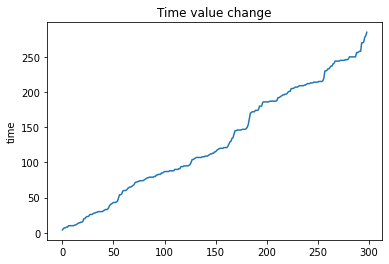

In [11]:
plt.plot(data['time']);
plt.title('Time value change');
plt.ylabel('time');

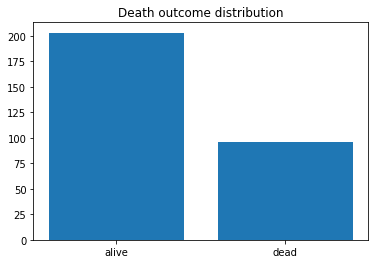

In [12]:
plt.bar(DEATH_LABELS, data['DEATH_EVENT'].value_counts())
plt.title('Death outcome distribution');

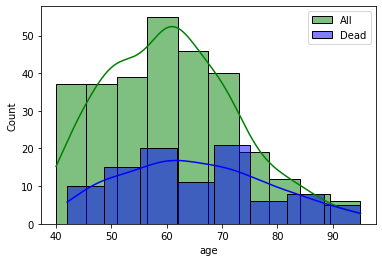

In [13]:
sns.histplot(data=data['age'], kde=True, label='All', color='green')
dead_data = data[data['DEATH_EVENT']==1]
sns.histplot(dead_data['age'], kde=True, label='Dead', color='blue');
plt.legend();

# Is the data verifying prior knowledge

- Women suffer more from anaemia V

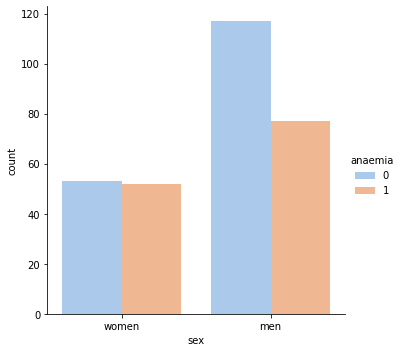

In [14]:
ax = sns.catplot(x="sex", kind="count", hue='anaemia', palette="pastel", data=data);
ax.set_xticklabels(SEX_LABELS);

- There are more men smokers than women smokers V

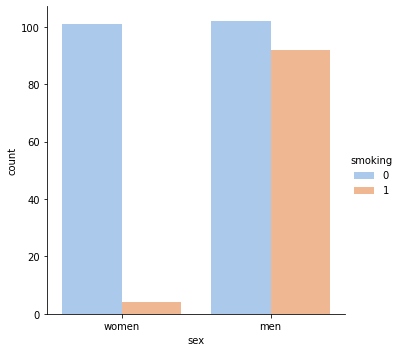

In [15]:
ax = sns.catplot(x="sex", kind="count", hue='smoking', palette="pastel", data=data);
ax.set_xticklabels(SEX_LABELS);

- Smokers are three times likely to die from heart disease X

In [16]:
data.groupby('DEATH_EVENT')['smoking'].value_counts(normalize=True)

DEATH_EVENT  smoking
0            0          0.674877
             1          0.325123
1            0          0.687500
             1          0.312500
Name: smoking, dtype: float64

- Older people suffer more from diabetes and high blood pressure X

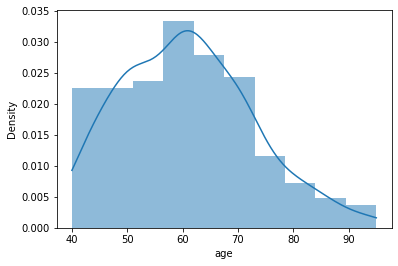

In [17]:
ages = data.age.astype(int)
ax = sns.histplot(ages, kde=True, stat="density", linewidth=0)

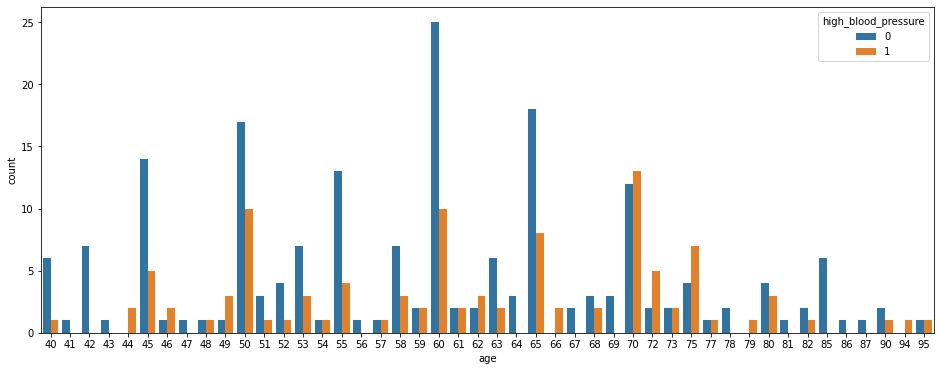

In [18]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x=data.age.astype(int), hue='high_blood_pressure', data=data)

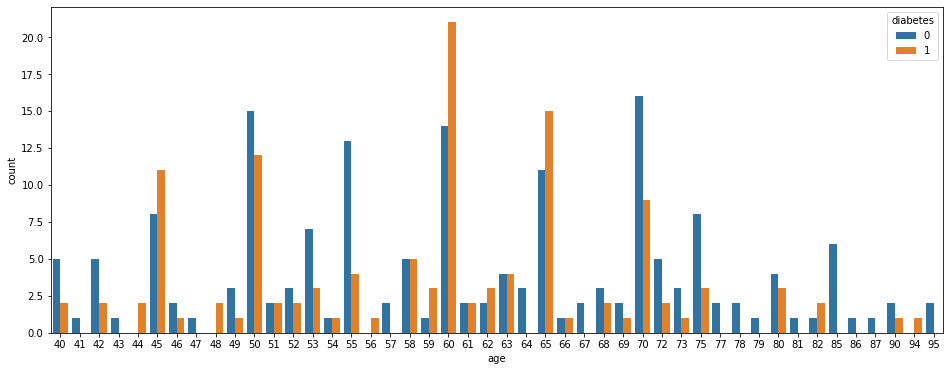

In [19]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x=data.age.astype(int), hue='diabetes', data=data)

- High blood pressure is twice as likely to strike a person with diabetes than a person without diabetes. X

In [20]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(data['diabetes'], data['high_blood_pressure'])

-0.012732381675485982

# Discovering feature relations

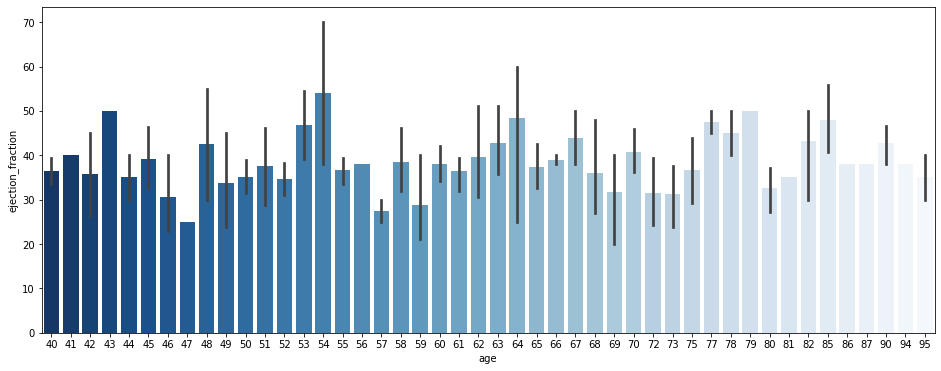

In [21]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x = data.age.astype(int), y = 'ejection_fraction', data=data, palette="Blues_r")

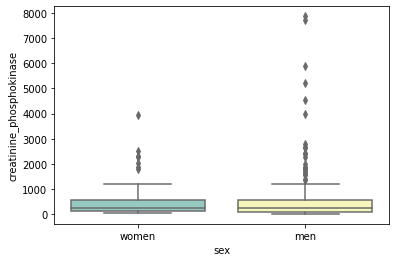

In [22]:
ax = sns.boxplot(x="sex", y="creatinine_phosphokinase", data=data, palette="Set3")
ax.set_xticklabels(SEX_LABELS);

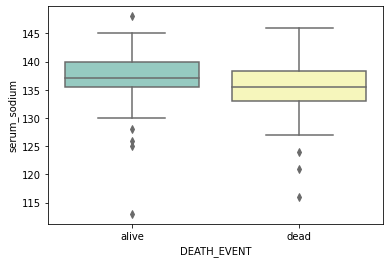

In [23]:
ax = sns.boxplot(x="DEATH_EVENT", y="serum_sodium", data=data, palette="Set3")
ax.set_xticklabels(DEATH_LABELS);

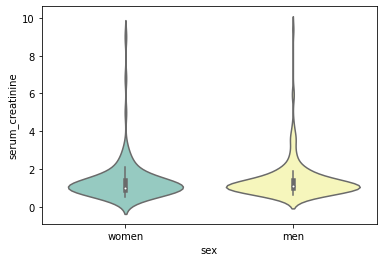

In [24]:
ax = sns.violinplot(x='sex', y='serum_creatinine', data=data, palette='Set3')
ax.set_xticklabels(['women', 'men']);

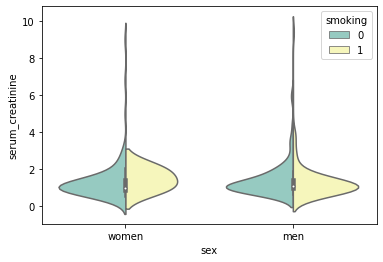

In [25]:
ax = sns.violinplot(x='sex', y='serum_creatinine', data=data, hue='smoking', palette='Set3', split='true')
ax.set_xticklabels(['women', 'men']);

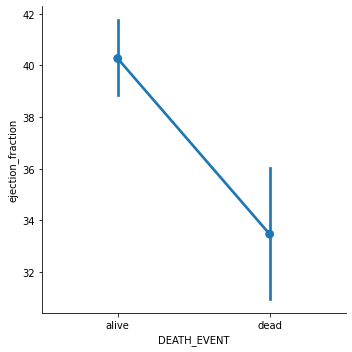

In [26]:
ax = sns.catplot(x='DEATH_EVENT', y='ejection_fraction', data=data, kind='point')
ax.set_xticklabels(DEATH_LABELS);

**Fact:** Low ejection fraction, sometimes called low EF, is the term we use to describe your ejection fraction. If it falls below 55% It means your heart isn't functioning as well as it could. 

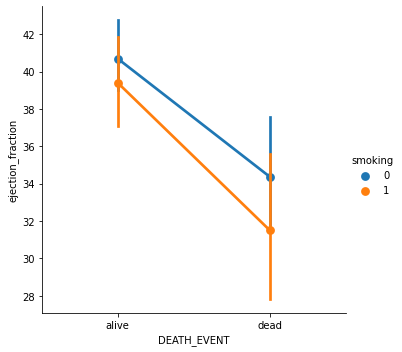

In [27]:
ax = sns.catplot(x='DEATH_EVENT', y='ejection_fraction', hue='smoking', data=data, kind='point')
ax.set_xticklabels(DEATH_LABELS);

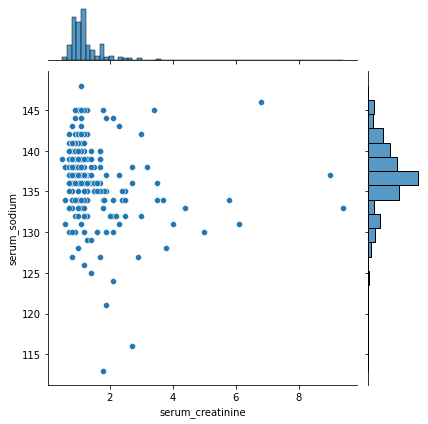

In [28]:
ax = sns.jointplot(x="serum_creatinine", y="serum_sodium", data=data)

**Fact:** A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L).

**Fact:** The normal range for creatinine in the blood may be 0.84 to 1.21 milligrams per deciliter (74.3 to 107 micromoles per liter), although this can vary from lab to lab, between men and women, and by age.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3543: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3543: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3543: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


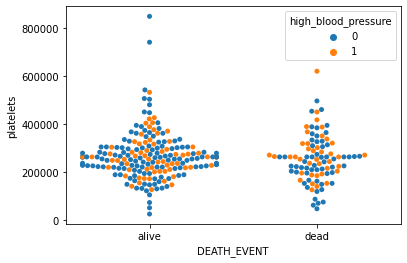

In [29]:
ax = sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='high_blood_pressure', data=data)
ax.set_xticklabels(DEATH_LABELS);

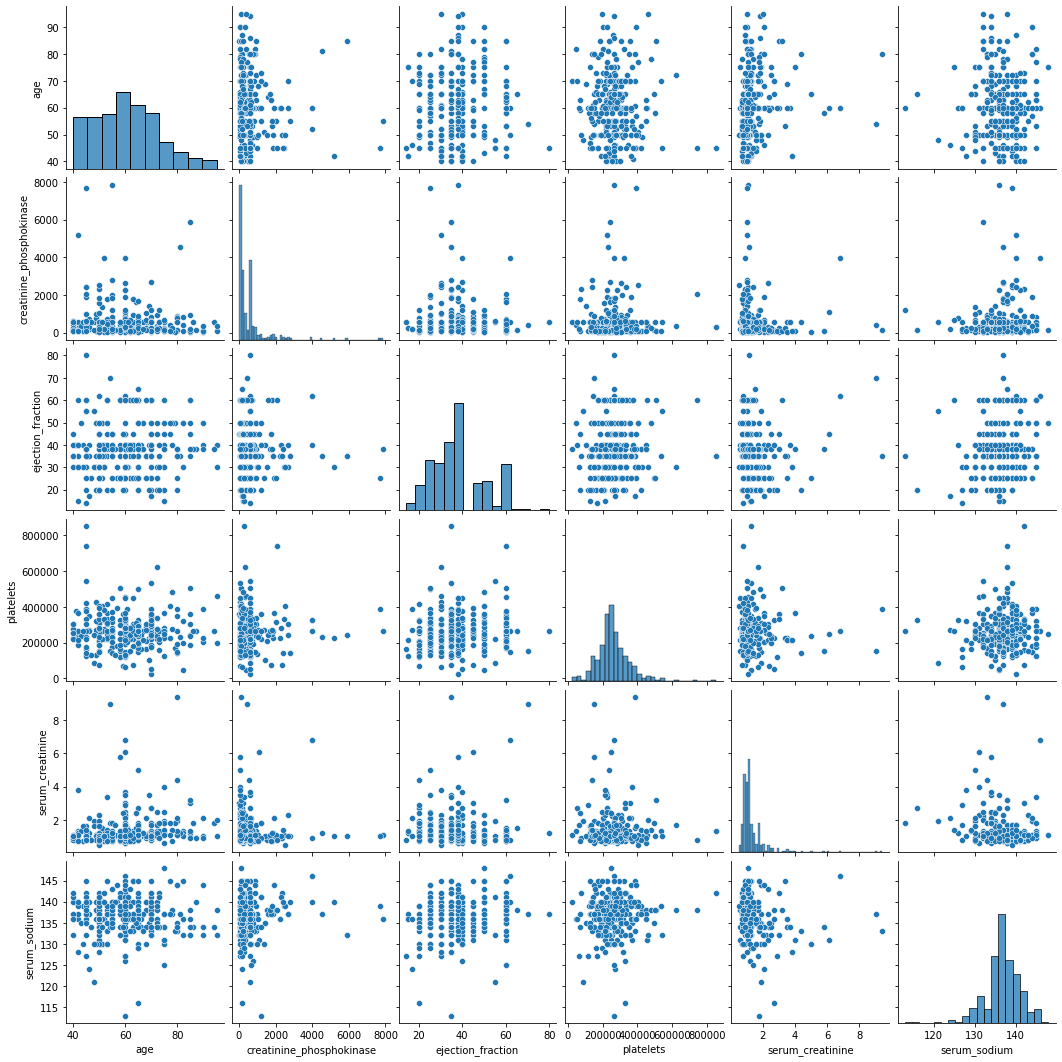

In [30]:
columns_to_remove = ['time', 'DEATH_EVENT'] + BINARY_FEATURES
g = sns.pairplot(data.drop(columns=columns_to_remove))

In [31]:
p_corr, p_pvalue = stats.pearsonr(data['ejection_fraction'], data['DEATH_EVENT'])
print('Pearson correlation: {}, pvalue: {}'.format(p_corr, p_pvalue)) 

Pearson correlation: -0.26860331239406215, pvalue: 2.4528974182084116e-06


In [32]:
s_corr, s_pvalue = stats.spearmanr(data['ejection_fraction'], data['DEATH_EVENT'])
print('Spearman correlation: {}, pvalue: {}'.format(s_corr, s_pvalue)) 

Spearman correlation: -0.2868685329791511, pvalue: 4.509285383185195e-07


In [33]:
k_corr, k_pvalue = stats.kendalltau(data['ejection_fraction'], data['DEATH_EVENT'])
print('Kendall correlation: {}, pvalue: {}'.format(k_corr, k_pvalue)) 

Kendall correlation: -0.24676586874176223, pvalue: 7.340980711754444e-07


In [34]:
data_for_correlation = data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine',
                             'serum_sodium']]

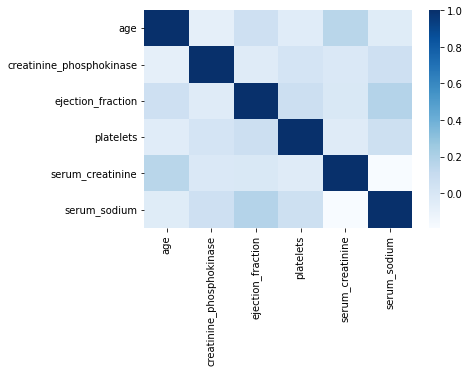

In [35]:
p_corr_data = data_for_correlation.corr(method='pearson');
sns.heatmap(data=p_corr_data, cmap="Blues");

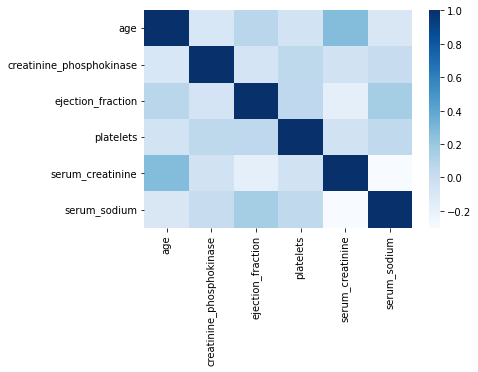

In [36]:
s_corr_data = data_for_correlation.corr(method='spearman');
sns.heatmap(data=s_corr_data, cmap="Blues");

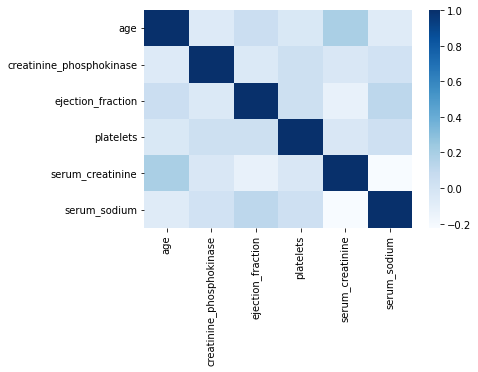

In [37]:
k_corr_data = data_for_correlation.corr(method='kendall');
sns.heatmap(data=k_corr_data, cmap="Blues");

In [38]:
data_for_cat_correlation = data[['smoking', 'DEATH_EVENT', 'anaemia', 'high_blood_pressure', 'sex']]

In [39]:
# ref: https://medium.com/analytics-vidhya/a-beginners-look-at-kaggle-b868ceb2eccf
def cramers_v_matrix(dataframe):
    cols = dataframe.columns
    columns_paired = [(i,j) for i in cols.values for j in cols.values] 
    df = pd.DataFrame(index=cols, columns=cols, dtype="float64")
    
    for v1, v2 in columns_paired:
        # generate contingency table:
        table = pd.crosstab(dataframe[v1], dataframe[v2])
        n     = len(dataframe.index)
        r, k  = table.shape
        
        # calculate chi squared and phi
        chi2  = stats.chi2_contingency(table)[0]
        phi2  = chi2/n
        
        # bias corrections:
        r = r - ((r - 1)**2)/(n - 1)
        k = k - ((k - 1)**2)/(n - 1)
        phi2 = max(0, phi2 - (k - 1)*(r - 1)/(n - 1))
        
        # fill correlation matrix
        df.loc[v1, v2] = np.sqrt(phi2/min(k - 1, r - 1))
        df.loc[v2, v1] = np.sqrt(phi2/min(k - 1, r - 1))
        np.fill_diagonal(df.values, np.ones(len(df)))
        
    return df

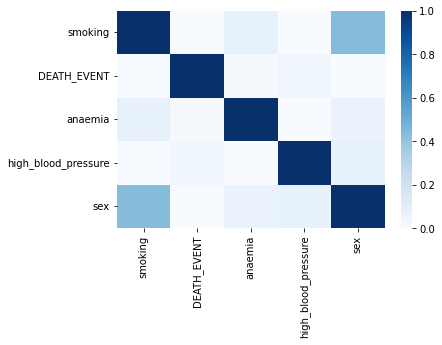

In [41]:
c_corr_data = cramers_v_matrix(data_for_cat_correlation)
sns.heatmap(c_corr_data, cmap="Blues");